# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10
#matname = 'HAP_quantization'
homeo_method = 'HEH'
matname = 'autoencoder_' + homeo_method
homeo_params = dict(eta_homeo=0.05, alpha_homeo=0.02, C=5., nb_quant=128, P_cum=None)
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method=homeo_method, homeo_params=homeo_params, verbose=verbose)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname='autoencoder')

Extracting data..No cache found data_cache/autoencoder_data: Extracting data... Extracting data..bittern62.png, reflection63.png, yose07.png, rocky10.png, koala52.png, craterlake12.png, clouds43.png, yellowleaves39.png, yose05.png, goldwater67.png, bird08.png, cattails70.png, flowers37.png, woods54.png, cucorn50.png, bora04.png, geyser27.png, flowerhill29.png, calcoast09.png, hibiscus30.png, Data is of shape : (81920, 256) - done in 4.89s.
Data is of shape : (81920, 256) - done in 5.11s.


In [5]:
!ls -l {shl.data_cache}/{matname}*

ls: data_cache/autoencoder_HEH*: No such file or directory


In [6]:
!ls -l {shl.data_cache}/{matname}*

ls: data_cache/autoencoder_HEH*: No such file or directory


In [7]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (81920, 256)
average of patches =  -0.00040462329634633214  +/-  0.04229047074493824
average energy of data =  0.5730346871432909 +/- 0.5859904404977079


In [8]:
shl.do_precision

False

## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

No cache found data_cache/autoencoder_HEH_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   0 /   4097 (elapsed time:   1s,  0.0mn)
Iteration  128 /   4097 (elapsed time:  153s,  2.0mn)
Iteration  256 /   4097 (elapsed time:  313s,  5.0mn)
Iteration  384 /   4097 (elapsed time:  472s,  7.0mn)
Iteration  512 /   4097 (elapsed time:  636s,  10.0mn)
Iteration  640 /   4097 (elapsed time:  876s,  14.0mn)
Iteration  768 /   4097 (elapsed time:  1004s,  16.0mn)
Iteration  896 /   4097 (elapsed time:  1129s,  18.0mn)
Iteration  1024 /   4097 (elapsed time:  1251s,  20.0mn)
Iteration  1152 /   4097 (elapsed time:  1378s,  22.0mn)
Iteration  1280 /   4097 (elapsed time:  1497s,  24.0mn)
Iteration  1408 /   4097 (elapsed time:  1617s,  26.0mn)
Iteration  1536 /   4097 (elapsed time:  1758s,  29.0mn)
Iteration  1664 /   4097 (elapsed time:  1887s,  31.0mn)
Iteration  1792 /   4097 (elapsed time:  2011s,  33.0mn)
Iteration  1920 /   4097 (

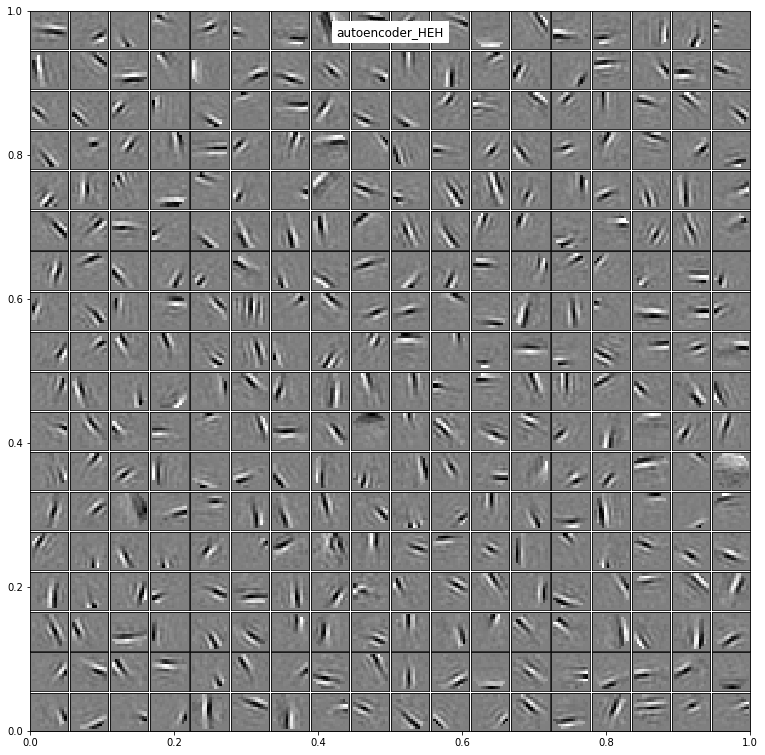

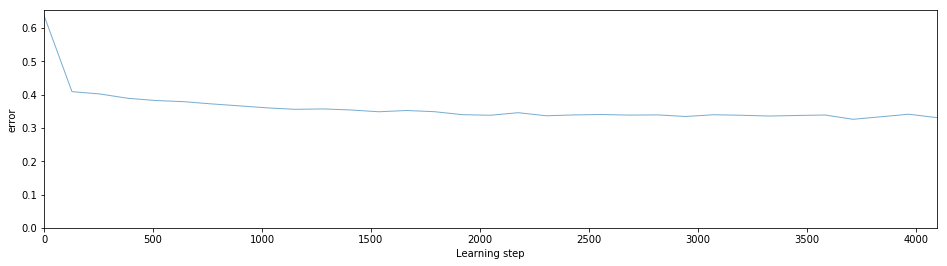

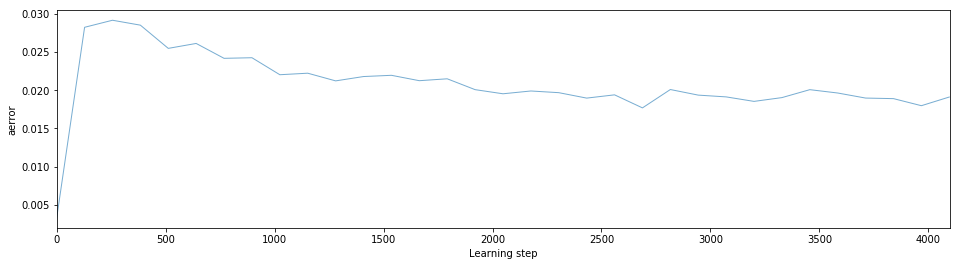

In [9]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_aerror']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']

dico = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [10]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (324, 256)
average of filters =  -4.816181996461828e-05 +/- 0.0028269423150878393
average energy of filters =  1.0 +/- 9.810654585376781e-17


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 324)
average of codewords =  0.11881429974278647
l0-sparseness of codewords =  0.08992663724922839  ~= l0/M = 0.09259259259259259
average energy of codewords =  0.6651399181371178
std of the average of individual patches =  0.02154227723959601
number of codes, size of reconstructed images =  (2048, 256)


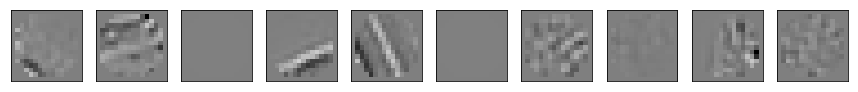

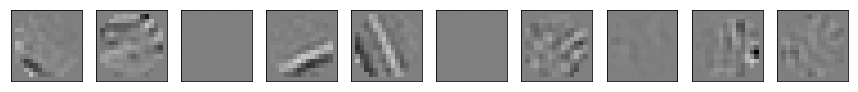

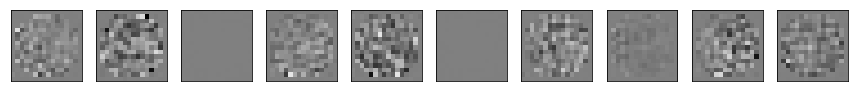

average of data patches =  -0.00040462329634633214 +/- 0.04229047074493824
average of residual patches =  0.00024289962064646844 +/- 0.02589004673641981
median energy of data =  0.3645349361711583
average energy of data =  0.5628003424318222 +/- 0.5871786543340974
average error =  0.00024289962064646844 +/- 0.2730737507984122
average energy of residual =  0.19065989101939346 +/- 0.19549459923949822
median energy of residual =  0.1278406726114022
average gain of coding =  2.8096360961425706 +/- 0.6746989129582208
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 324)
average of codewords =  0.11881572878861846
l0-sparseness of codewords =  0.08992513020833333  ~= l0/M = 0.09259259259259259
average energy of codewords =  0.6652289800046565
std of the average of individual patches =  0.021571615969102054
number of codes, size of reconstructed images =  (2048, 256)


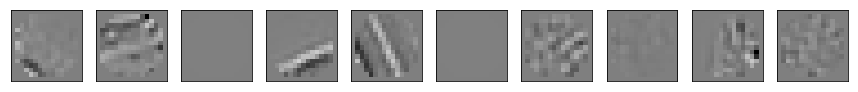

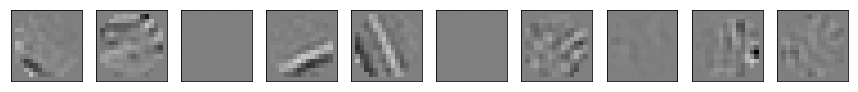

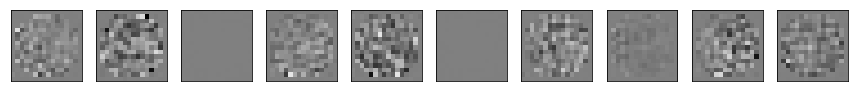

average of data patches =  -0.00040462329634633214 +/- 0.04229047074493824
average of residual patches =  0.00027229295275469137 +/- 0.025934195248189615
median energy of data =  0.3645349361711583
average energy of data =  0.5628003424318222 +/- 0.5871786543340974
average error =  0.00027229295275469137 +/- 0.2730588144527586
average energy of residual =  0.19065077673955233 +/- 0.195482663227212
median energy of residual =  0.12784067261140214
average gain of coding =  2.8097713490292997 +/- 0.675463986180686
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 324)
average of codewords =  0.11862524814643811
l0-sparseness of codewords =  0.08990403163580248  ~= l0/M = 0.09259259259259259
average energy of codewords =  0.6649476287992682
std of the average of individual patches =  0.020575737568847452
number of codes, size of reconstructed images =  (2048, 256)


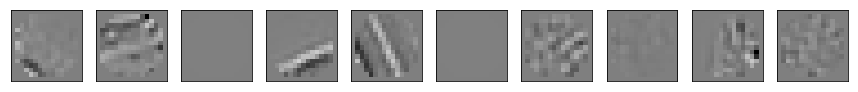

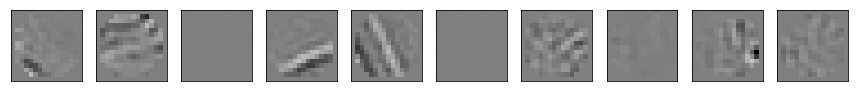

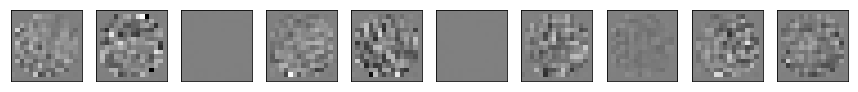

average of data patches =  -0.00040462329634633214 +/- 0.04229047074493824
average of residual patches =  -0.0006505795661235444 +/- 0.02752777695356097
median energy of data =  0.3645349361711583
average energy of data =  0.5628003424318222 +/- 0.5871786543340974
average error =  -0.0006505795661235444 +/- 0.2751862403565587
average energy of residual =  0.19269276453851733 +/- 0.19646218116943798
median energy of residual =  0.1294348922961843
average gain of coding =  2.750850775227228 +/- 0.671458678452833


In [11]:
from shl_scripts.shl_encode import mp
nb_quant = 128
record_num_batches = 2048
np.random.seed(1973)
indx = np.random.permutation(data.shape[0])[:record_num_batches]
#sparse_code = shl.code(data, dico, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico.P_cum
#P_cum = None
l0_sparseness = 200
l0_sparseness = shl.l0_sparseness
for P_cum, gain in zip([None, P_cum_zeroeffect, dico.P_cum], [np.ones(shl.n_dictionary), None, None]):
    print(50*'🐒')
    sparse_code = mp(data[indx, :], dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('average energy of codewords = ', sparse_code.std(axis=0).mean())
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

    patches = sparse_code @ dico.dictionary
    print('number of codes, size of reconstructed images = ', patches.shape)

    from shl_scripts.shl_tools import show_data
    max_patches = 10
    fig, axs = show_data(data[indx, :][:max_patches, :])
    plt.show()
    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    error = data[indx, :] - patches
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(error[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
    #SD = np.linalg.norm(data[indx, :])/record_num_batches

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    #print('total energy of data = ', np.sqrt(np.sum(data**2)))
    #print('total deviation of data = ', np.sum(np.abs(data)))
    print('average error = ', error.mean(), '+/-', error.std())
    SE = np.sqrt(np.mean(error**2, axis=1))
    #SE = np.linalg.norm(error)/record_num_batches

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    #print('total energy of residual = ', np.sqrt(np.sum(error**2)))
    #print('total deviation of residual = ', np.sum(np.abs(error)))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

## Shuffling the coefficients

In [12]:
print(sparse_code.shape)

(2048, 324)


In [13]:
help(np.random.shuffle)

Help on built-in function shuffle:

shuffle(...) method of mtrand.RandomState instance
    shuffle(x)
    
    Modify a sequence in-place by shuffling its contents.
    
    This function only shuffles the array along the first axis of a
    multi-dimensional array. The order of sub-arrays is changed but
    their contents remains the same.
    
    Parameters
    ----------
    x : array_like
        The array or list to be shuffled.
    
    Returns
    -------
    None
    
    Examples
    --------
    >>> arr = np.arange(10)
    >>> np.random.shuffle(arr)
    >>> arr
    [1 7 5 2 9 4 3 6 0 8]
    
    Multi-dimensional arrays are only shuffled along the first axis:
    
    >>> arr = np.arange(9).reshape((3, 3))
    >>> np.random.shuffle(arr)
    >>> arr
    array([[3, 4, 5],
           [6, 7, 8],
           [0, 1, 2]])



In [14]:
sparse_code_bar = sparse_code.copy()
#sparse_code_bar = sparse_code_bar.T
np.random.shuffle(sparse_code_bar)
#sparse_code_bar = sparse_code_bar.T
print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0))
print('average non-zeros', np.count_nonzero(sparse_code, axis=0))

average non-zeros [139 148 134 170 138 142 152 216 200 158 179 311 151 204 237 167 135 175
 235 177 273 221 280 154 171 222 255 223 150 156 183 223 132 204 167 172
 146 186 197 274 157 189 160 146 103 218 165 132 134 201 187 170 165 193
 257 167 158 167 192 176 169 222 284 173 159 200 143 113 183 155 123 303
 195 141 191 259 139 235 197 203 133 265 210 145 159 167 185 137 118 167
 193 195 179 144 216 230 161 175 223 179 167 187 199 161 145 212 186 204
 163 202 155 196 147 164 182 151 210 233 196 172 233 167 222 200 193 188
 155 138 153 123 214 146 191 164 188 141 201 265 201 129 193 172 230 151
 203 170 173 166 148 177 242 145 136 115 129 239 243 211 228 287 166 165
 157 175 199 209 217 177 207 204 169 201 188 216 239 149 173 182 156 220
 233 137 220 186 127 141 150 153 298 162 139 146 159 166 229 230 141 174
 195 172 168 197 199 248 233 166 191 154 130 144 313 156 153 160 195 286
 141 171 240 168 154 191 179 213 130 188 171 152 142 220 233 192 160 171
 193 173 197 194 160 171 161 211 

In [15]:
print(sparse_code_bar.shape)

(2048, 324)


In [16]:
patches_bar = sparse_code_bar @ dico.dictionary
sparse_code_rec = mp(patches_bar, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)

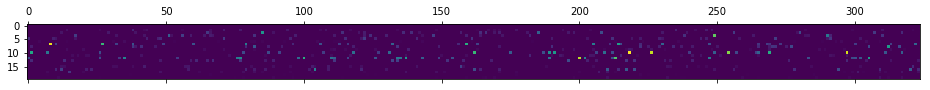

In [17]:
N_show = 120
plt.matshow(sparse_code_bar[:N_show, :])

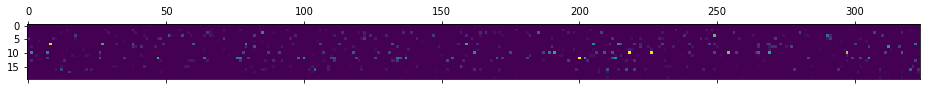

In [18]:
plt.matshow(sparse_code_rec[:N_show, :])

In [19]:
print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_rec)))
print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar-sparse_code_rec)))

mean deviation of coefficients =  0.11115100397760308
total deviation of coefficients =  0.030968616206424746


In [20]:
from shl_scripts.shl_encode import quantile, rescaling
#sparse_code = mp(data, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum)
stick = np.arange(shl.n_dictionary)*nb_quant
C = 5.
q_rec = quantile(P_cum, rescaling(sparse_code_rec, C=C), stick, do_fast=True)
q_bar = quantile(P_cum, rescaling(sparse_code_bar, C=C), stick, do_fast=True)

In [21]:
print('mean deviation of coefficients = ', np.mean(np.abs(q_bar)))
print('total deviation of coefficients = ', np.mean(np.abs(q_bar-q_rec)))

mean deviation of coefficients =  0.07767065985641318
total deviation of coefficients =  0.018863773890572855


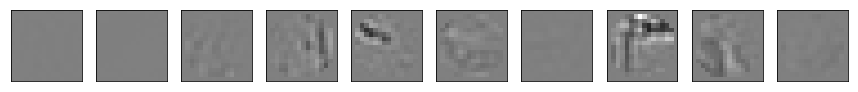

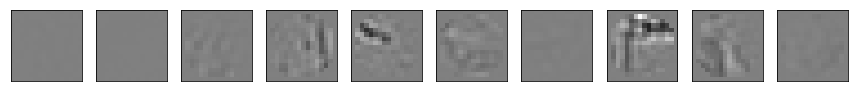

average of data patches =  -0.0006918472925611892 +/- 0.03175990724690248
average of residual patches =  -0.0006604593500579329 +/- 0.006697536189455442
median energy of data =  0.33395159772777694
average energy of data =  0.5228675106936003 +/- 0.5531309244810994
average energy of residual =  0.07029857091582947 +/- 0.0746605107077575
median energy of residual =  0.0454734256653689
average gain of coding =  7.327957428989787 +/- 2.8013817028101626


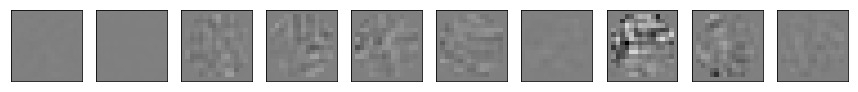

In [22]:
patches_rec = sparse_code_rec @ dico.dictionary
error = patches_bar - patches_rec
fig, axs = show_data(patches_bar[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
plt.show()
fig, axs = show_data(patches_rec[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
plt.show()
fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(error[:max_patches, :])))
print('average of data patches = ', patches_bar.mean(), '+/-', patches_bar.mean(axis=1).std())
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
SD = np.sqrt(np.mean(patches_bar**2, axis=1))
print('median energy of data = ', np.median(SD))
print('average energy of data = ', SD.mean(), '+/-', SD.std())

SE = np.sqrt(np.mean(error**2, axis=1))
print('average energy of residual = ', SE.mean(), '+/-', SE.std())
print('median energy of residual = ', np.median(SE))
#print('total energy of residual = ', np.sqrt(np.sum(error**2)))
#print('total deviation of residual = ', np.sum(np.abs(error)))
print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

## comparing to the learning without homeostasis

Extracting data..loading the data called : data_cache/autoencoder_data
Data is of shape : (81920, 256) - done in 0.30s.
No cache found data_cache/autoencoder_None_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   0 /   4097 (elapsed time:   0s,  0.0mn)
Iteration  128 /   4097 (elapsed time:  25s,  0.0mn)
Iteration  256 /   4097 (elapsed time:  46s,  0.0mn)
Iteration  384 /   4097 (elapsed time:  65s,  1.0mn)
Iteration  512 /   4097 (elapsed time:  86s,  1.0mn)
Iteration  640 /   4097 (elapsed time:  107s,  1.0mn)
Iteration  768 /   4097 (elapsed time:  128s,  2.0mn)
Iteration  896 /   4097 (elapsed time:  147s,  2.0mn)
Iteration  1024 /   4097 (elapsed time:  166s,  2.0mn)
Iteration  1152 /   4097 (elapsed time:  187s,  3.0mn)
Iteration  1280 /   4097 (elapsed time:  210s,  3.0mn)
Iteration  1408 /   4097 (elapsed time:  229s,  3.0mn)
Iteration  1536 /   4097 (elapsed time:  247s,  4.0mn)
Iteration  1664 /   4097 (elapsed time:

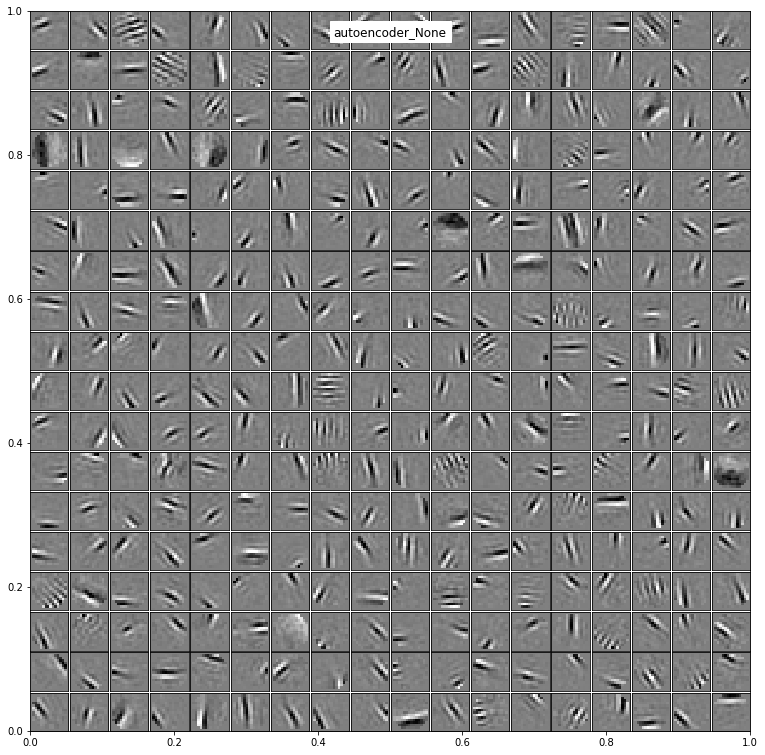

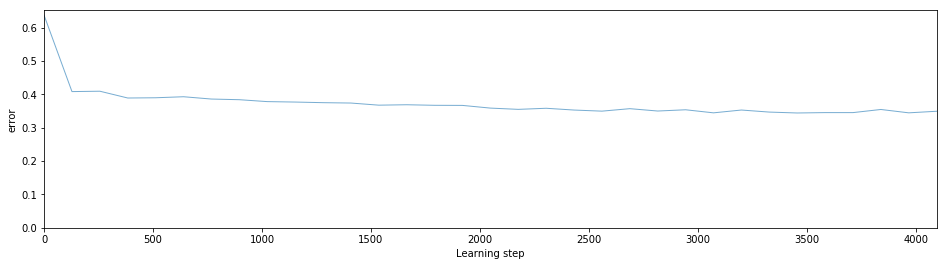

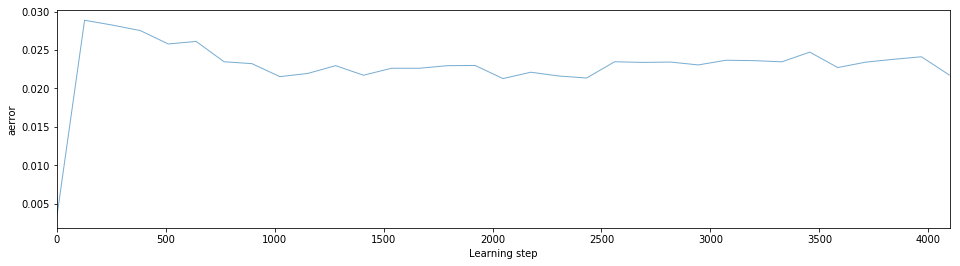

In [24]:
homeo_method = 'None'
matname = 'autoencoder_' + homeo_method
#homeo_params = dict(eta_homeo=0.05, alpha_homeo=0.02, C=5., nb_quant=128, P_cum=None)
homeo_params = dict()
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method=homeo_method, homeo_params=homeo_params, verbose=verbose)

from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname='autoencoder')
dico = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

### coding


In [25]:
from shl_scripts.shl_encode import mp
nb_quant = 128
record_num_batches = 2048
np.random.seed(1973)
l0_sparseness = 200
l0_sparseness = shl.l0_sparseness

indx = np.random.permutation(data.shape[0])[:record_num_batches]

sparse_code = mp(data[indx, :], dico.dictionary, l0_sparseness=l0_sparseness, P_cum=None, gain=gain)

print('number of codes, size of codewords = ', sparse_code.shape)
print('average of codewords = ', sparse_code.mean())
print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
print('average energy of codewords = ', sparse_code.std(axis=0).mean())
print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

patches = sparse_code @ dico.dictionary
print('number of codes, size of reconstructed images = ', patches.shape)

from shl_scripts.shl_tools import show_data
max_patches = 10
fig, axs = show_data(data[indx, :][:max_patches, :])
plt.show()
fig, axs = show_data(patches[:max_patches, :])
plt.show()
error = data[indx, :] - patches
fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(error[:max_patches, :])))
plt.show()
print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
#SD = np.linalg.norm(data[indx, :])/record_num_batches

print('median energy of data = ', np.median(SD))
print('average energy of data = ', SD.mean(), '+/-', SD.std())
#print('total energy of data = ', np.sqrt(np.sum(data**2)))
#print('total deviation of data = ', np.sum(np.abs(data)))
print('average error = ', error.mean(), '+/-', error.std())
SE = np.sqrt(np.mean(error**2, axis=1))
#SE = np.linalg.norm(error)/record_num_batches

print('average energy of residual = ', SE.mean(), '+/-', SE.std())
print('median energy of residual = ', np.median(SE))
#print('total energy of residual = ', np.sqrt(np.sum(error**2)))
#print('total deviation of residual = ', np.sum(np.abs(error)))
print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

AttributeError: 'NoneType' object has no attribute 'shape'

### Shuffling the coefficients

In [ ]:
sparse_code_bar = sparse_code.copy()
np.random.shuffle(sparse_code_bar)


print(sparse_code_bar.shape)

patches_bar = sparse_code_bar @ dico.dictionary
sparse_code_rec = mp(patches_bar, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)

plt.matshow(sparse_code_bar[:N_show, :])

plt.matshow(sparse_code_rec[:N_show, :])

In [ ]:
print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_rec)))
print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar-sparse_code_rec)))

In [ ]:
from shl_scripts.shl_encode import quantile, rescaling
#sparse_code = mp(data, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum)
stick = np.arange(shl.n_dictionary)*nb_quant
C = 5.
q_rec = quantile(P_cum, rescaling(sparse_code_rec, C=C), stick, do_fast=True)
q_bar = quantile(P_cum, rescaling(sparse_code_bar, C=C), stick, do_fast=True)

In [ ]:
print('mean deviation of coefficients = ', np.mean(np.abs(q_bar)))
print('total deviation of coefficients = ', np.mean(np.abs(q_bar-q_rec)))

In [ ]:
patches_rec = sparse_code_rec @ dico.dictionary
error = patches_bar - patches_rec
fig, axs = show_data(patches_bar[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
plt.show()
fig, axs = show_data(patches_rec[:max_patches, :], cmax=np.max(np.abs(patches_bar[:max_patches, :])))
plt.show()
fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(error[:max_patches, :])))
print('average of data patches = ', patches_bar.mean(), '+/-', patches_bar.mean(axis=1).std())
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
SD = np.sqrt(np.mean(patches_bar**2, axis=1))
print('median energy of data = ', np.median(SD))
print('average energy of data = ', SD.mean(), '+/-', SD.std())

SE = np.sqrt(np.mean(error**2, axis=1))
print('average energy of residual = ', SE.mean(), '+/-', SE.std())
print('median energy of residual = ', np.median(SE))
#print('total energy of residual = ', np.sqrt(np.sum(error**2)))
#print('total deviation of residual = ', np.sum(np.abs(error)))
print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts